# Card Fraud Detection
### Bahcesehir University
#### CMP5101 : Data Mining project

###### Youssef EL OUARIDGHI / 2107282

My task in this project is to know if a transaction is legit or a fraud using a dataset that i found on kaggle based on train data and test data.


## Problem and Data understanding
For banks, the main goal is to retain its customers. However banking fraud is a huge threat to these banks in terms of financial losses, credibilty and trust, this is a concerning issue to both customers and banks alike. Card fraud detection using machine learning is a necessity for these banks to monitor and prevent fraud from happening.

The data set includes credit card transactions made by European cardholders over a period of two days in September 2013.Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for 0.172% of the total transactions. The data set has also been modified with principal component analysis (PCA) to maintain confidentiality. Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value of 1 in cases of fraud and 0 in others.



### Importing the dependencies

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Loading the data 

In [2]:
# Loading the data
cdf = pd.read_csv('creditcard.csv')
# 5 first rows
cdf.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# 5 last rows
cdf.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
# Checking the shape of the dataset
cdf.shape

(284807, 31)

In [5]:
# Checking distribution of numerical values in the dataset
cdf.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Checking the datatypes and null and non-null distribution
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Checking null values
cdf.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
cdf['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
normal = cdf[cdf.Class == 0]
fraud = cdf[cdf.Class == 1]

## Exploratory of the data


<AxesSubplot:xlabel='Class', ylabel='count'>

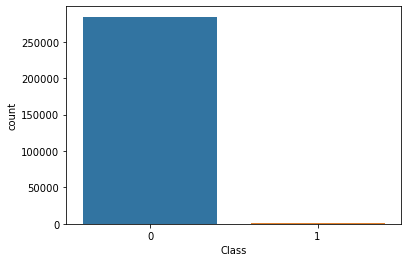

In [10]:
sns.countplot(cdf['Class'])

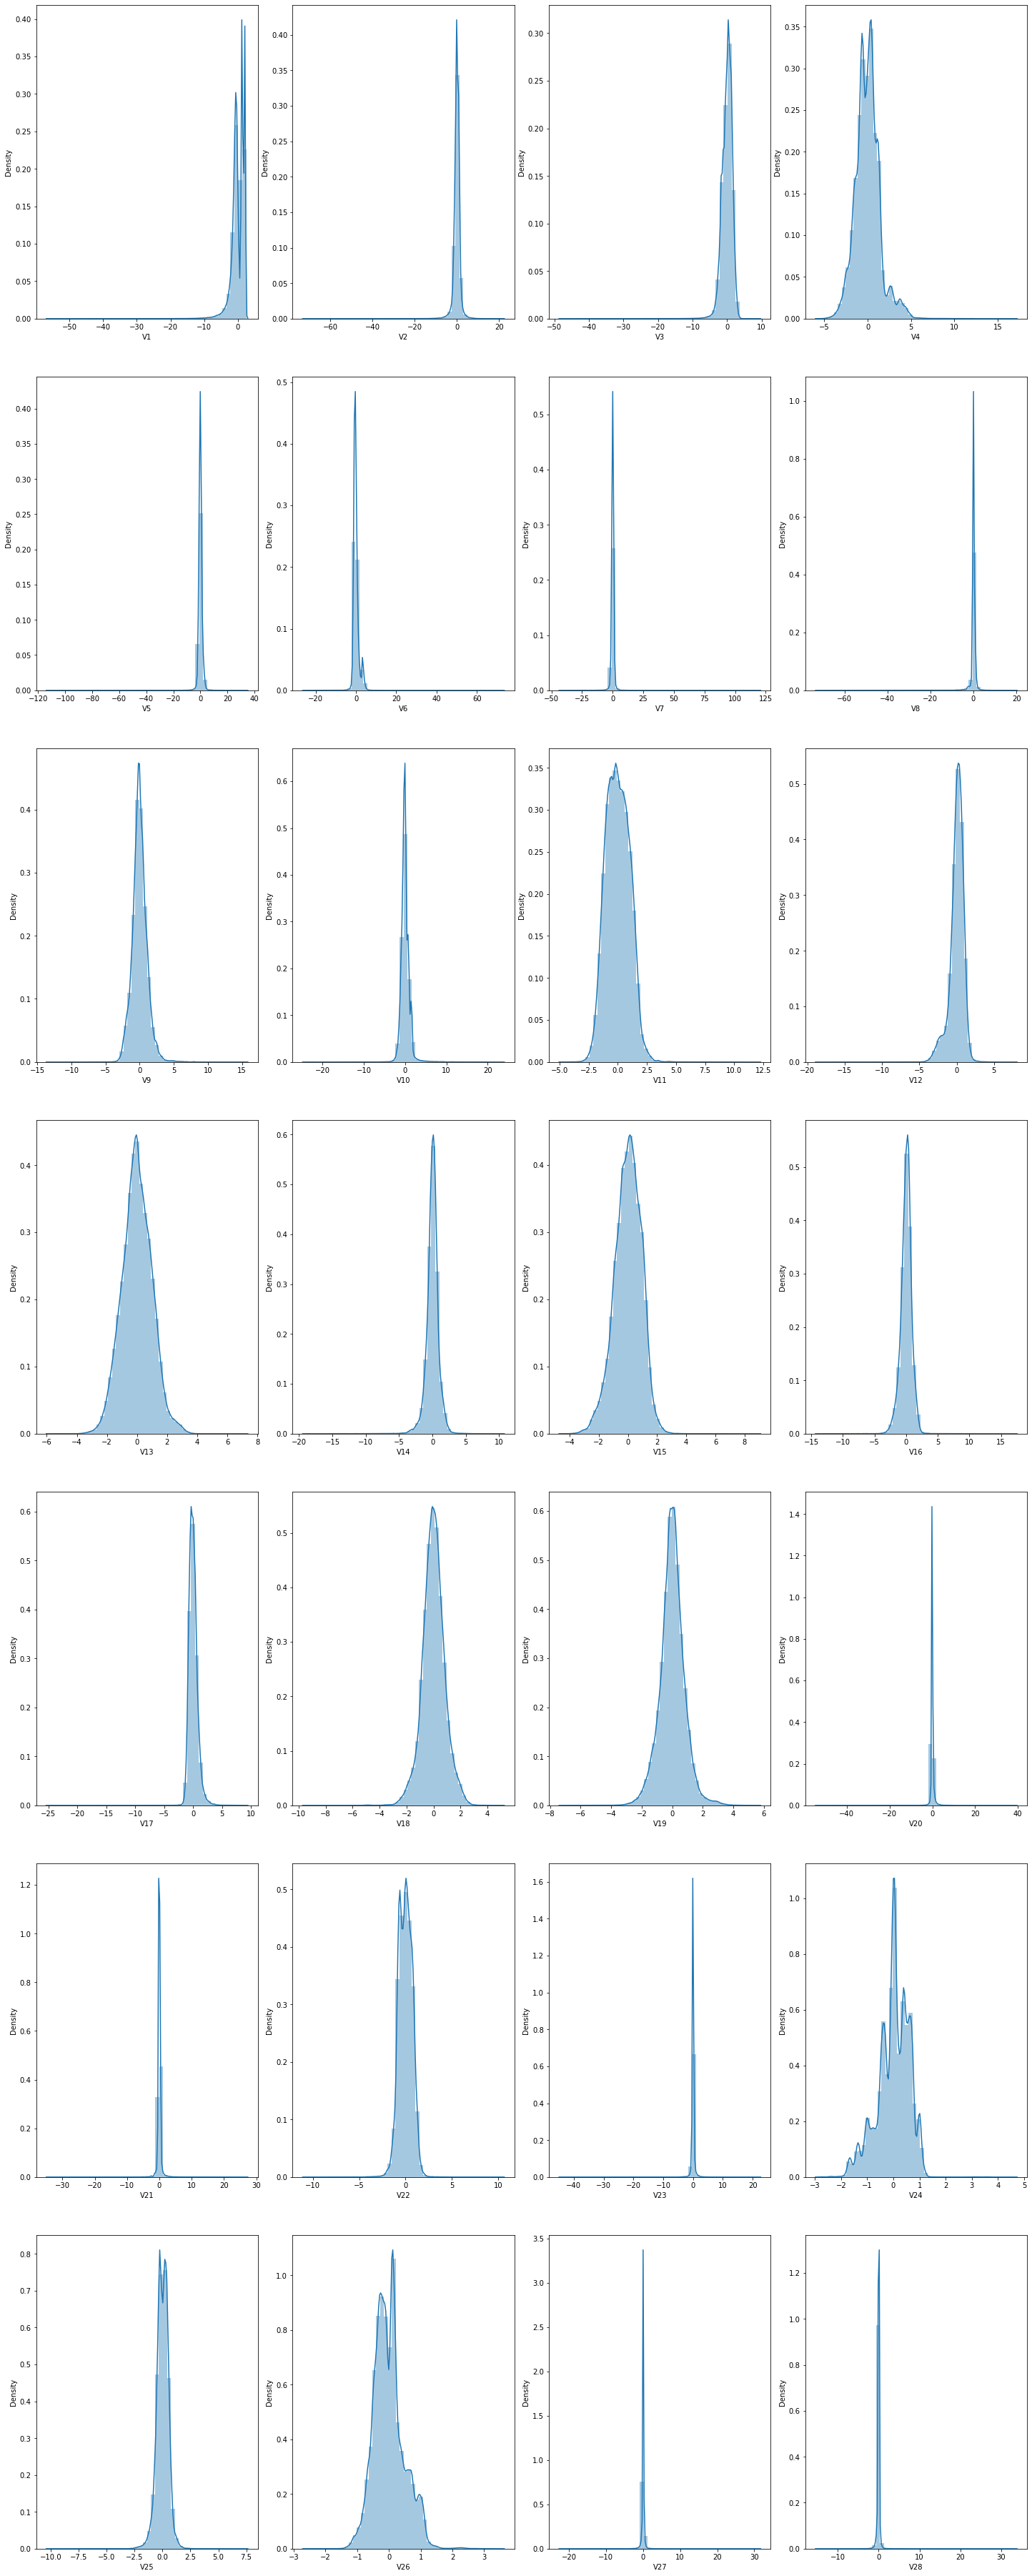

In [11]:
cdf_tmp = cdf.drop(columns=['Time', 'Amount', 'Class'], axis=1)

#creating dist plots
fig, ax= plt.subplots(ncols=4, nrows=7, figsize=(20, 50))
index = 0
ax = ax.flatten()

for col in cdf_tmp.columns:
    sns.distplot(cdf_tmp[col], ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)

<AxesSubplot:xlabel='Time', ylabel='Density'>

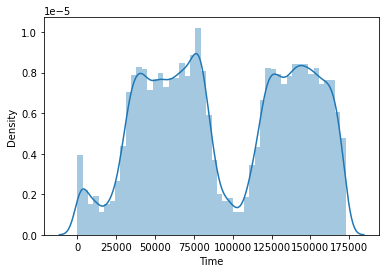

In [12]:
sns.distplot(cdf['Time'])

<AxesSubplot:xlabel='Amount', ylabel='Density'>

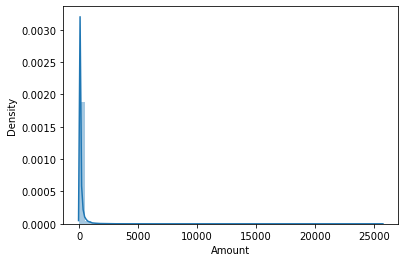

In [13]:
sns.distplot(cdf['Amount'])

## Correlation matrix


<AxesSubplot:>

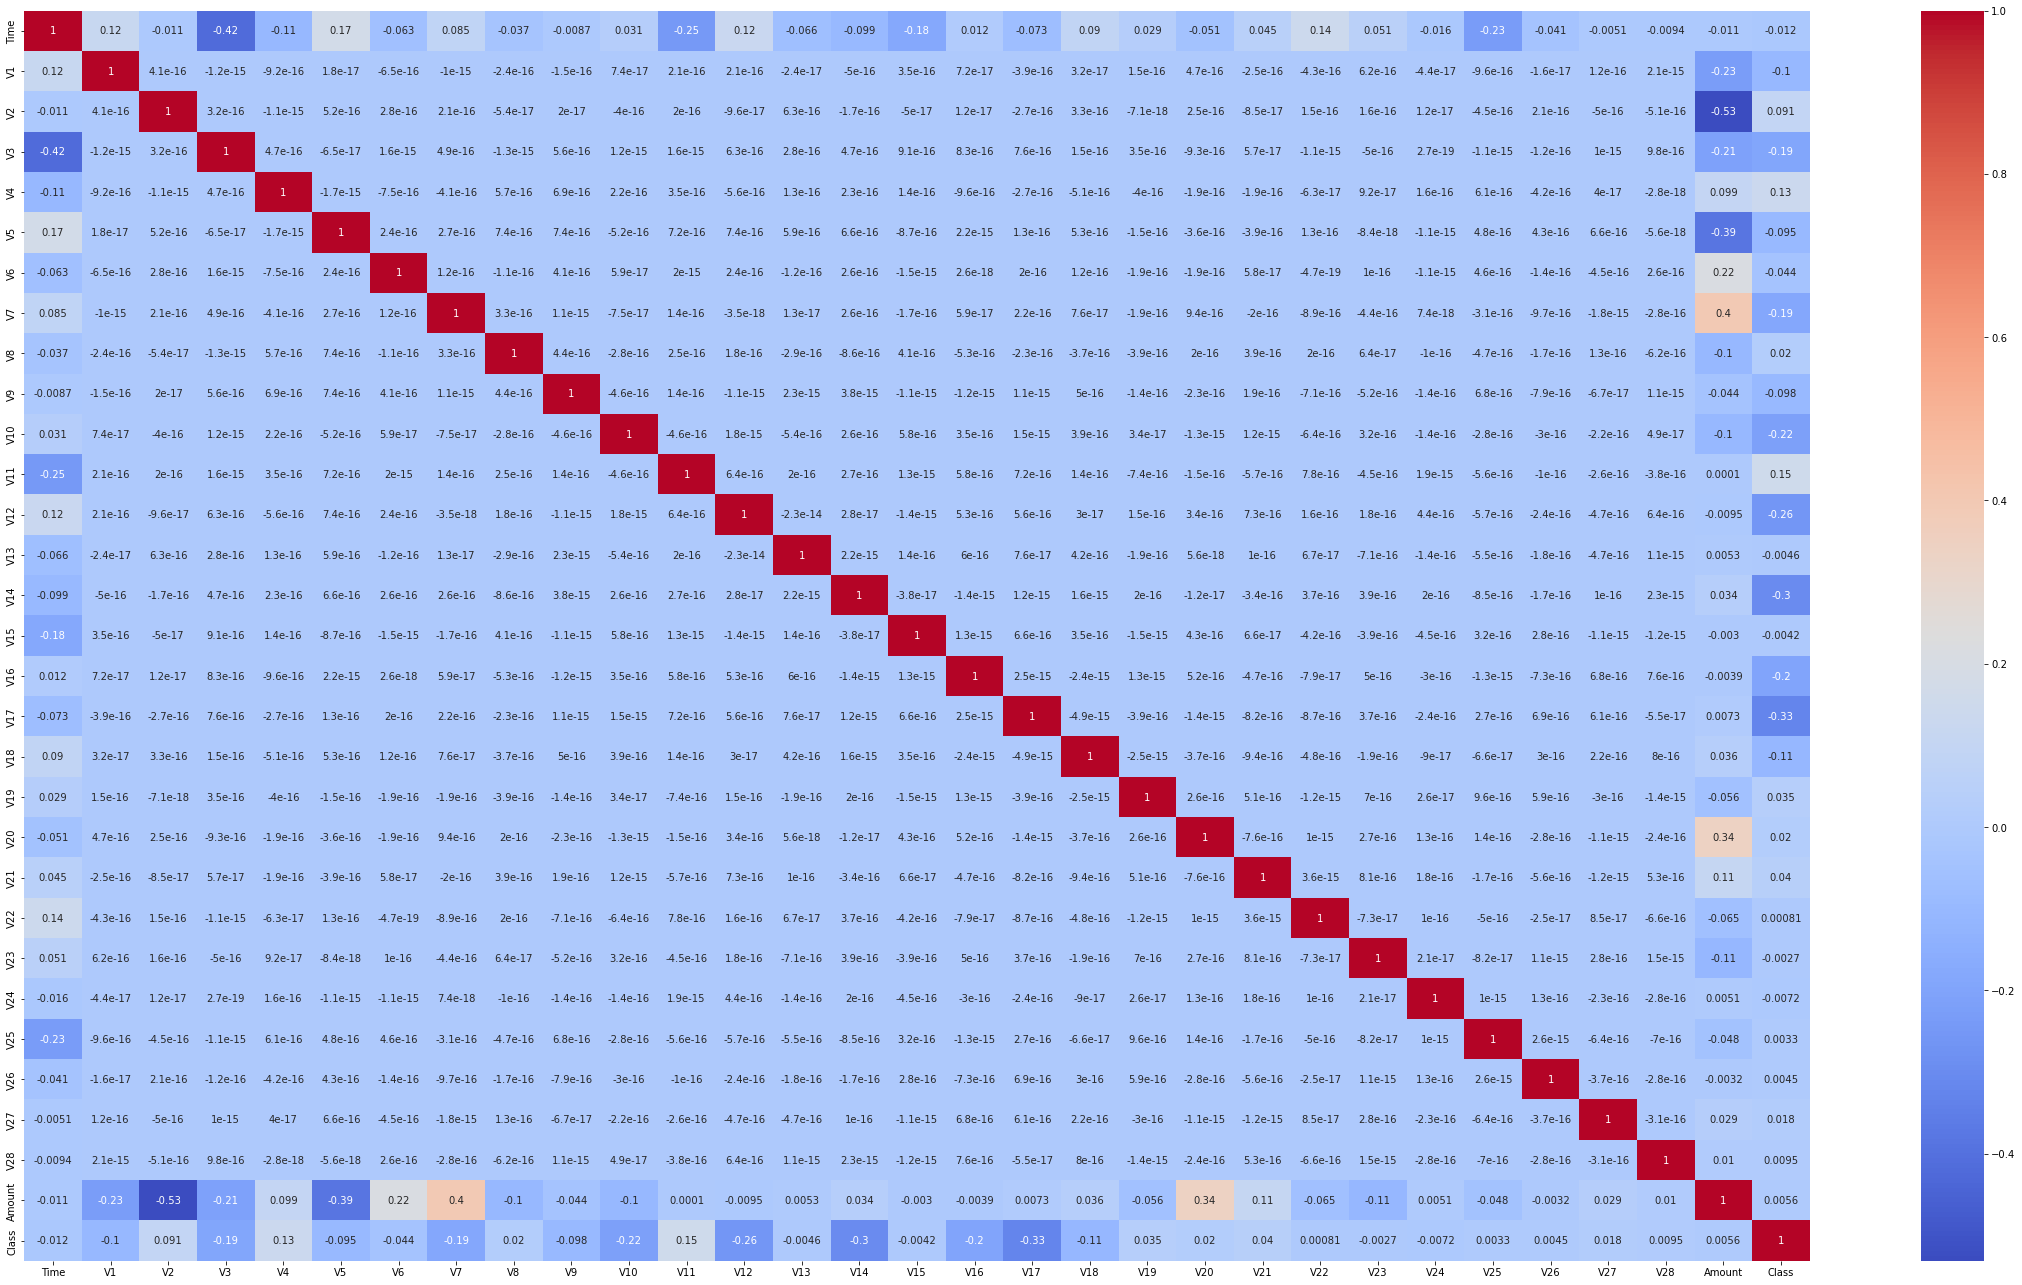

In [14]:
corr = cdf.corr()
plt.figure(figsize=(40,23))
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Input Split

In [15]:
X = cdf.drop(columns=['Class'], axis=1)
y = cdf['Class']

### Standard scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaler = sc.fit_transform(X)

In [17]:
X_scaler[-1]

array([ 1.64205773, -0.27233093, -0.11489898,  0.46386564, -0.35757   ,
       -0.00908946, -0.48760183,  1.27476937, -0.3471764 ,  0.44253246,
       -0.84072963, -1.01934641, -0.0315383 , -0.18898634, -0.08795849,
        0.04515766, -0.34535763, -0.77752147,  0.1997554 , -0.31462479,
        0.49673933,  0.35541083,  0.8861488 ,  0.6033653 ,  0.01452561,
       -0.90863123, -1.69685342, -0.00598394,  0.04134999,  0.51435531])

## Model Training

In [18]:
#train and split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
from sklearn.linear_model import LogisticRegression
modl = LogisticRegression()
# training
modl.fit(X_train, y_train)
# testing
y_pred1 = modl.predict(X_test)
print(classification_report(y_test, y_pred1))
print("F1 Score : ", f1_score(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.65      0.73        98

    accuracy                           1.00     56962
   macro avg       0.92      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962

F1 Score :  0.7314285714285713


In [20]:
cnf_matrix = confusion_matrix(y_test,y_pred1)

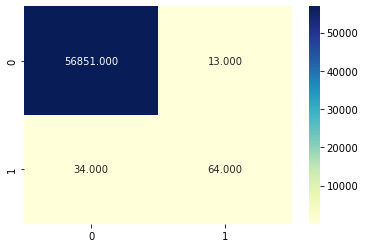

In [21]:
labels =[0,1]
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()

In [22]:
from sklearn.ensemble import RandomForestClassifier
modl = RandomForestClassifier()
# training
modl.fit(X_train, y_train)
# testing
y_pred2 = modl.predict(X_test)
print(classification_report(y_test, y_pred2))
print("F1 Score : ", f1_score(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.81      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962

F1 Score :  0.8681318681318683


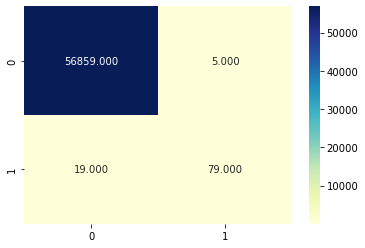

In [23]:
cnf_matrix = confusion_matrix(y_test,y_pred2)
labels =[0,1]
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()

In [24]:
from xgboost import XGBClassifier
modl = XGBClassifier(n_jobs=-1)
# training
modl.fit(X_train, y_train)
# testing
y_pred3 = modl.predict(X_test)
print(classification_report(y_test, y_pred3))
print("F1 Score : ", f1_score(y_test, y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962

F1 Score :  0.8695652173913043


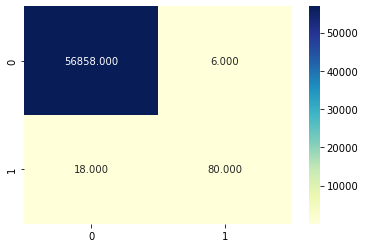

In [25]:
cnf_matrix = confusion_matrix(y_test,y_pred3)
labels =[0,1]
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()

## Class Imbalancement

<AxesSubplot:xlabel='Class', ylabel='count'>

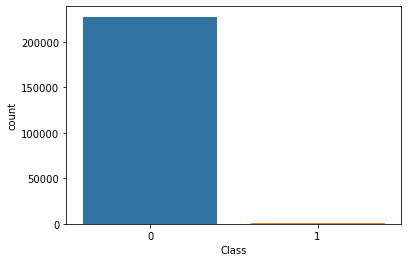

In [26]:
sns.countplot(y_train)

### Over Sampling the dataset

In [27]:
# Balance the class with equal distribution
from imblearn.over_sampling import SMOTE
over_sample = SMOTE()
x_smote, y_smote = over_sample.fit_resample(X_train, y_train)

<AxesSubplot:xlabel='Class', ylabel='count'>

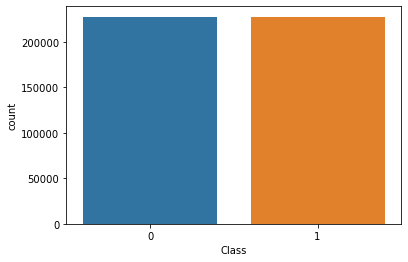

In [28]:
sns.countplot(y_smote)

In [29]:
from sklearn.linear_model import LogisticRegression
modl = LogisticRegression()
# training
modl.fit(x_smote, y_smote)
# testing
y_pred4 = modl.predict(X_test)
print(classification_report(y_test, y_pred4))
print("F1 Score : ", f1_score(y_test, y_pred4))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

F1 Score :  0.10746268656716418


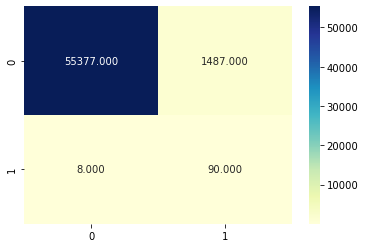

In [30]:
cnf_matrix = confusion_matrix(y_test,y_pred4)
labels =[0,1]
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()

In [31]:
from sklearn.ensemble import RandomForestClassifier
modl = RandomForestClassifier(n_jobs=-1)
# training
modl.fit(x_smote, y_smote)
# testing
y_pred5 = modl.predict(X_test)
print(classification_report(y_test, y_pred5))
print("F1 Score : ", f1_score(y_test, y_pred5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.82      0.84        98

    accuracy                           1.00     56962
   macro avg       0.93      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

F1 Score :  0.8421052631578948


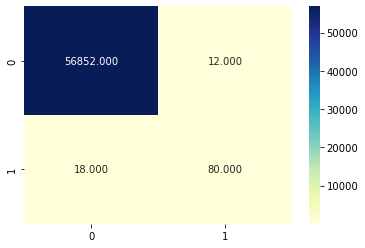

In [32]:
cnf_matrix = confusion_matrix(y_test,y_pred5)
labels =[0,1]
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()

In [33]:
from xgboost import XGBClassifier
modl = XGBClassifier(n_jobs=-1)
# training
modl.fit(x_smote, y_smote)
# testing
y_pred6 = modl.predict(X_test)
print(classification_report(y_test, y_pred6))
print("F1 Score : ", f1_score(y_test, y_pred6))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.89      0.78        98

    accuracy                           1.00     56962
   macro avg       0.85      0.94      0.89     56962
weighted avg       1.00      1.00      1.00     56962

F1 Score :  0.780269058295964


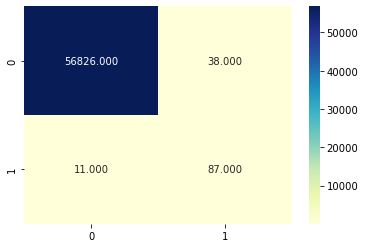

In [34]:
cnf_matrix = confusion_matrix(y_test,y_pred6)
labels =[0,1]
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()

### Under Sampling the dataset

In [35]:
normal_sample = normal.sample(n=492)

In [36]:
# Concatenate the dataframes
new_ds = pd.concat([normal_sample, fraud], axis=0)

In [37]:
new_ds.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
217347,140856.0,1.873286,0.453629,-0.623282,3.725302,0.583346,0.603233,0.019312,0.094908,-0.998328,...,0.131625,0.514334,0.101544,0.775375,0.136334,0.039232,-0.031555,-0.051877,7.86,0
164698,116921.0,0.399104,0.448376,-0.613094,0.940977,1.389605,-1.004203,1.137034,-0.399296,-0.323054,...,0.321956,1.225201,0.136266,0.007664,-1.644648,-0.762014,0.212945,0.130440,1.00,0
192182,129574.0,2.189309,-0.679111,-1.325481,-0.889715,-0.514495,-1.215781,-0.307133,-0.390985,-0.638950,...,0.462770,1.314965,0.052377,1.219640,0.185511,0.007166,-0.042661,-0.051952,25.00,0
122483,76577.0,1.077145,-0.070688,-0.084850,1.079741,0.359940,0.769090,0.021334,0.186059,0.102908,...,-0.082621,-0.174125,-0.258384,-1.011946,0.749651,-0.271335,0.022758,0.005797,69.94,0
164564,116817.0,1.870237,-1.029830,-0.510516,-0.961855,-0.671761,0.375568,-0.962159,0.215562,1.581650,...,0.090133,0.221396,0.178593,0.150216,-0.529742,0.510964,-0.036488,-0.036275,88.61,0


In [38]:
new_ds.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [39]:
new_ds['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [40]:
new_ds.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,91794.680894,-0.018576,0.052866,0.120567,0.053396,0.020729,0.008220,0.015580,0.072534,0.038268,...,-0.009722,-0.023703,0.019941,-0.001659,0.023286,-0.006275,0.017483,0.003162,0.010995,75.235650
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [41]:
# Splitting the data into Features and targets
z = new_ds.drop(columns='Class', axis = 1)
t = new_ds['Class']

In [42]:
print(z)

            Time        V1        V2        V3        V4        V5        V6  \
217347  140856.0  1.873286  0.453629 -0.623282  3.725302  0.583346  0.603233   
164698  116921.0  0.399104  0.448376 -0.613094  0.940977  1.389605 -1.004203   
192182  129574.0  2.189309 -0.679111 -1.325481 -0.889715 -0.514495 -1.215781   
122483   76577.0  1.077145 -0.070688 -0.084850  1.079741  0.359940  0.769090   
164564  116817.0  1.870237 -1.029830 -0.510516 -0.961855 -0.671761  0.375568   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [43]:
print(t)

217347    0
164698    0
192182    0
122483    0
164564    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


<AxesSubplot:xlabel='Class', ylabel='count'>

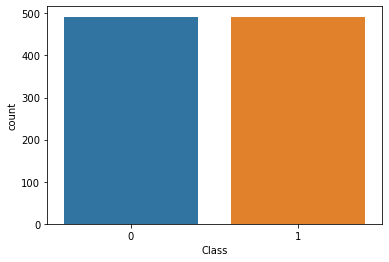

In [44]:
sns.countplot(t)

<AxesSubplot:>

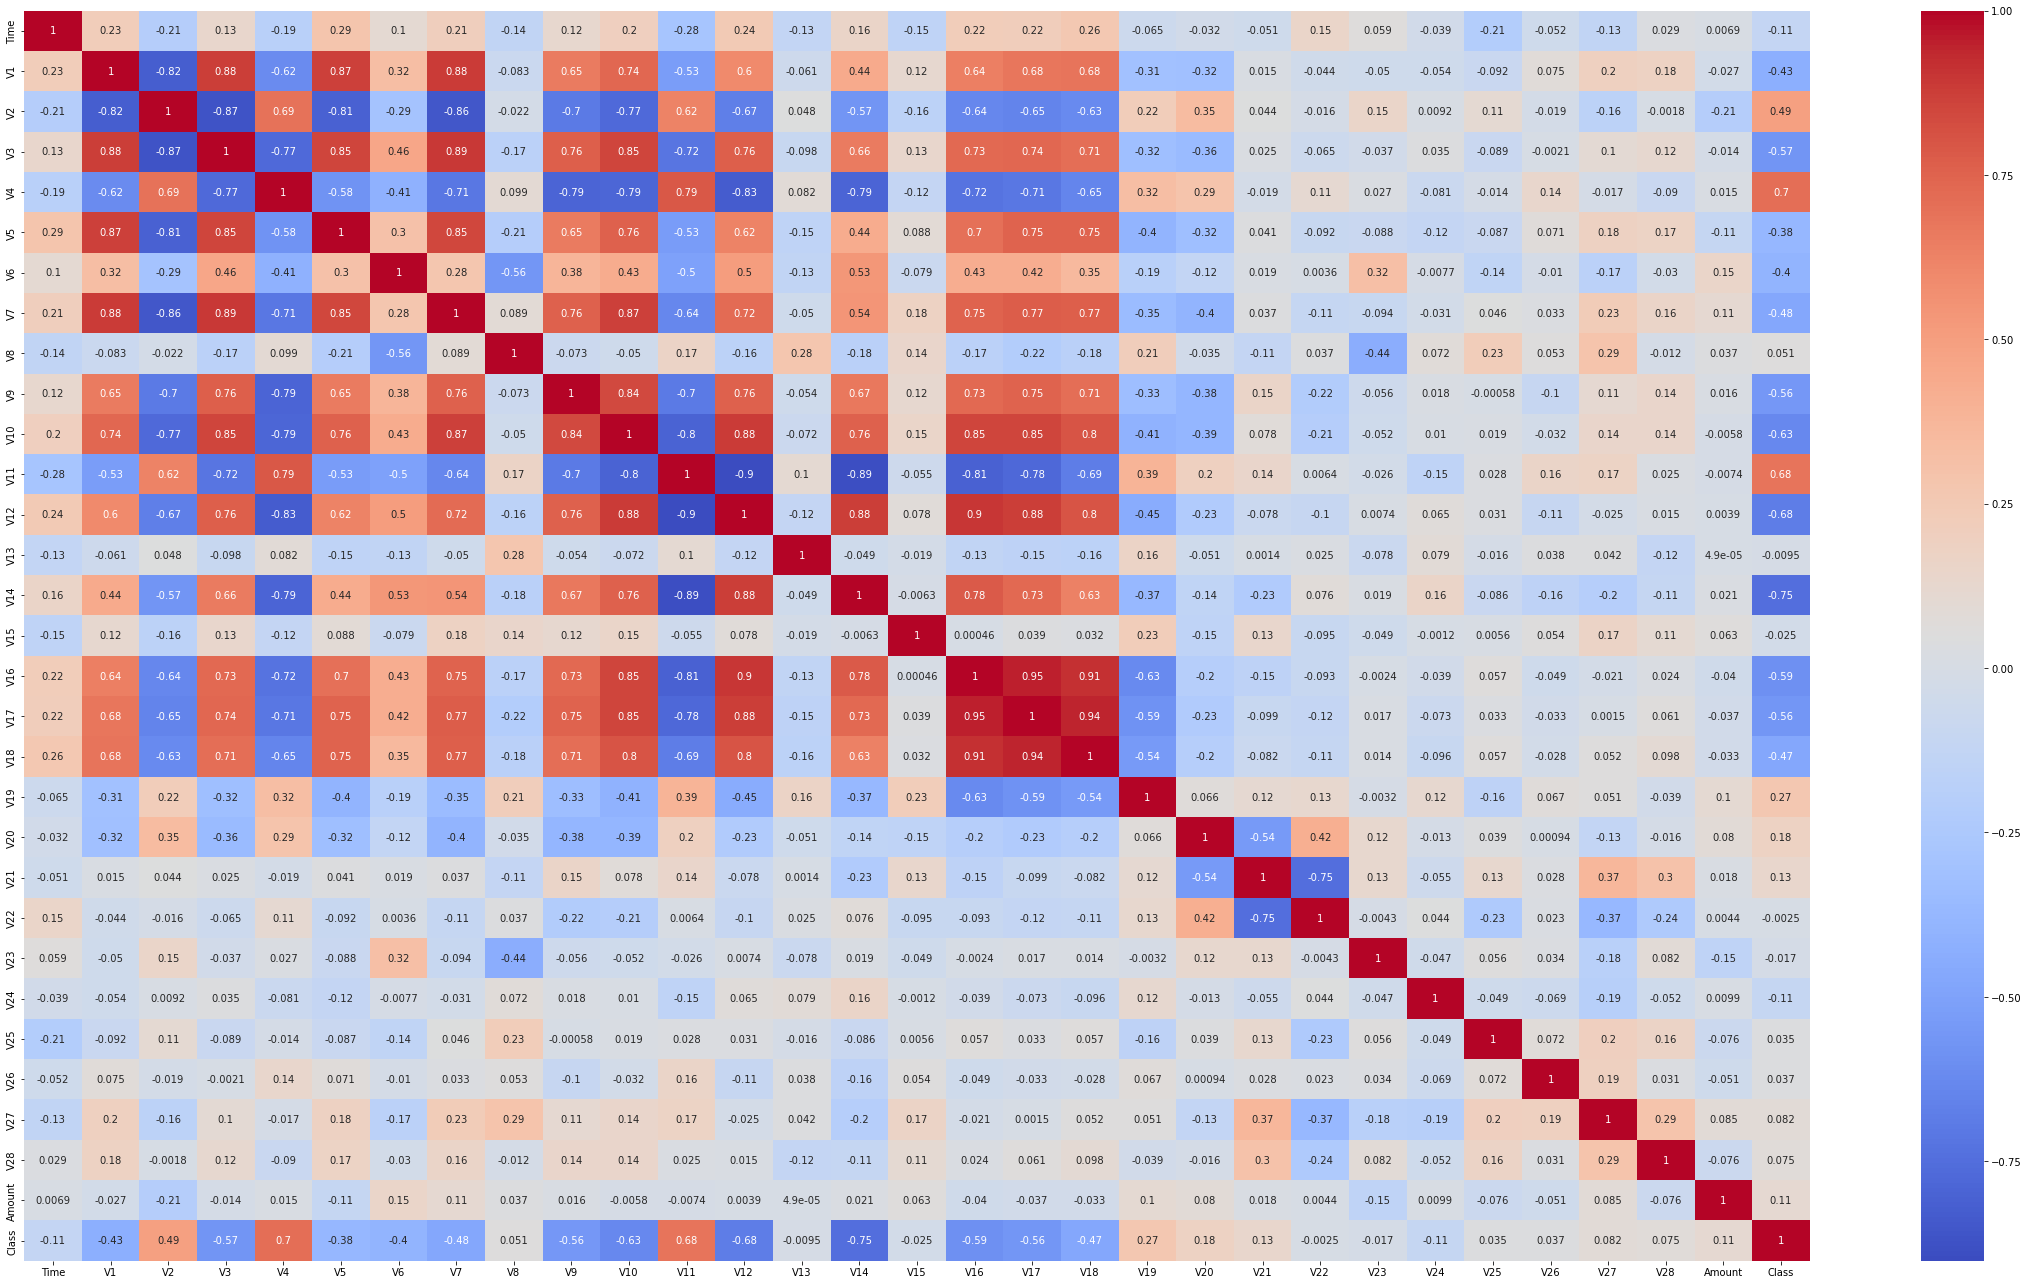

In [45]:
corr = new_ds.corr()
plt.figure(figsize=(40,23))
sns.heatmap(corr, annot=True, cmap='coolwarm')

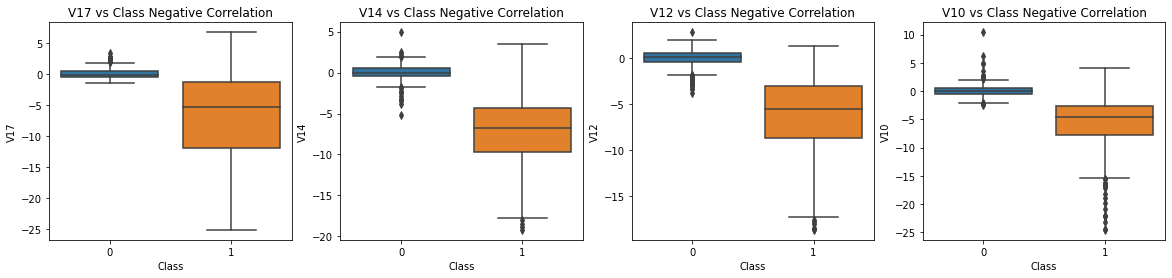

In [46]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_ds, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_ds, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_ds, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_ds, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

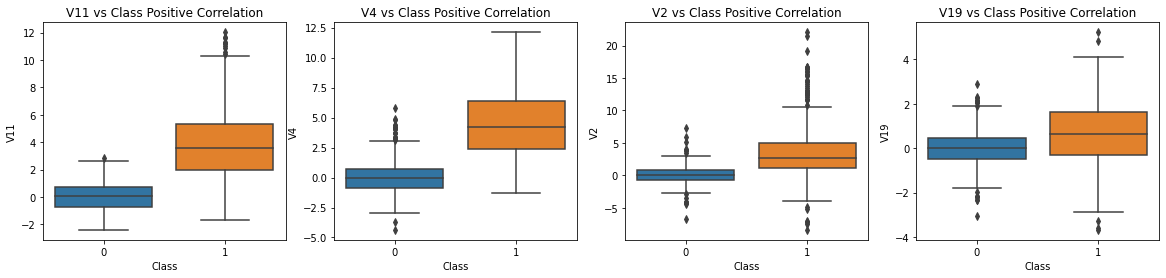

In [47]:

f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_ds, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_ds, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_ds, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_ds, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

In [48]:
# Split the data into training and testing data
z_train, z_test, t_train, t_test = train_test_split(z, t, test_size=0.2, stratify=t, random_state=2)

In [49]:
print(z.shape, z_train.shape, z_test.shape)

(984, 30) (787, 30) (197, 30)


In [50]:
# Model training
model = LogisticRegression()

In [51]:
model.fit(z_train, t_train)

LogisticRegression()

In [52]:
model.fit(z_train, t_train)
# testing
t_pred1 = model.predict(z_test)
print(classification_report(t_test, t_pred1))
print("F1 Score : ", f1_score(t_test, t_pred1))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        99
           1       0.95      0.89      0.92        98

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197

F1 Score :  0.9157894736842105


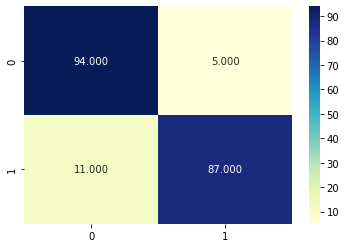

In [53]:
cnf_matrix = confusion_matrix(t_test,t_pred1)
labels =[0,1]
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()

In [54]:
model = RandomForestClassifier()
# training
model.fit(z_train, t_train)
# testing
t_pred2 = model.predict(z_test)
print(classification_report(t_test, t_pred2))
print("F1 Score : ", f1_score(t_test, t_pred2))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94        99
           1       0.99      0.88      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197

F1 Score :  0.9297297297297297


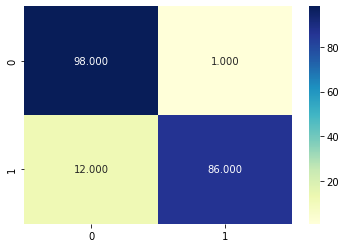

In [55]:
cnf_matrix = confusion_matrix(t_test,t_pred2)
labels =[0,1]
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()

In [56]:
model = XGBClassifier()
# training
model.fit(z_train, t_train)
# testing
t_pred3 = model.predict(z_test)
print(classification_report(t_test, t_pred3))
print("F1 Score : ", f1_score(t_test, t_pred3))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93        99
           1       0.99      0.87      0.92        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197

F1 Score :  0.9239130434782609


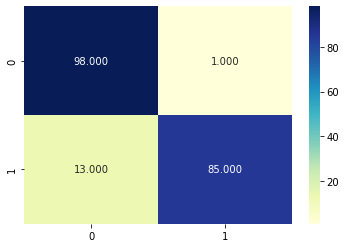

In [57]:
cnf_matrix = confusion_matrix(t_test,t_pred3)
labels =[0,1]
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()

In [58]:
score1=metrics.f1_score(y_test,y_pred1)
score2=metrics.f1_score(y_test,y_pred2)
score3=metrics.f1_score(y_test,y_pred3)
score4=metrics.f1_score(y_test,y_pred4)
score5=metrics.f1_score(y_test,y_pred5)
score6=metrics.f1_score(y_test,y_pred6)
score7=metrics.f1_score(t_test,t_pred1)
score8=metrics.f1_score(t_test,t_pred2)
score9=metrics.f1_score(t_test,t_pred3)

In [59]:
print(score1,score2,score3,score4,score5,score6,score7,score8,score9)

0.7314285714285713 0.8681318681318683 0.8695652173913043 0.10746268656716418 0.8421052631578948 0.780269058295964 0.9157894736842105 0.9297297297297297 0.9239130434782609


In [60]:
final_data = pd.DataFrame({'Full_data':['LR', 'RF', 'XGB'], 'F1_score':[score1,score2,score3]})
final_data2= pd.DataFrame({'Over_sampling':['LR', 'RF', 'XGB'], 'F1_score':[score4,score5,score6]})
final_data3= pd.DataFrame({'Under_sampling':['LR', 'RF', 'XGB'], 'F1_score':[score7,score8,score9]})

In [61]:
final_data

,Full_data,F1_score
0,LR,0.731429
1,RF,0.868132
2,XGB,0.869565


In [62]:
final_data2

,Over_sampling,F1_score
0,LR,0.107463
1,RF,0.842105
2,XGB,0.780269


In [63]:
final_data3

,Under_sampling,F1_score
0,LR,0.915789
1,RF,0.929730
2,XGB,0.923913


<AxesSubplot:xlabel='Full_data', ylabel='F1_score'>

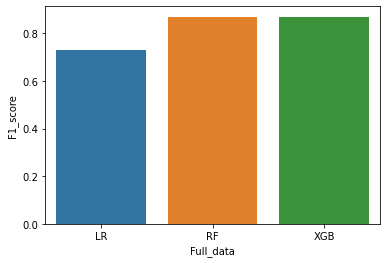

In [64]:
sns.barplot(final_data['Full_data'], final_data['F1_score'])



<AxesSubplot:xlabel='Over_sampling', ylabel='F1_score'>

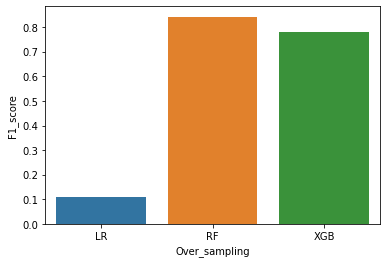

In [65]:
sns.barplot(final_data2['Over_sampling'], final_data2['F1_score'])

<AxesSubplot:xlabel='Under_sampling', ylabel='F1_score'>

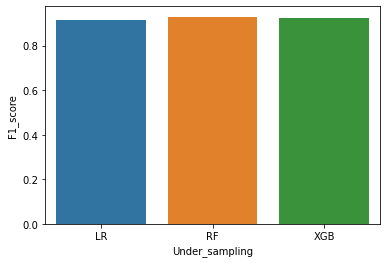

In [66]:
sns.barplot(final_data3['Under_sampling'], final_data3['F1_score'])